### Linear regression using numpy

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
# 1. Design model (input, output size , forward pass)
# 2. Construct loss and optimizer
# 3. Training loop
#    - foward pass : compute predictions and loss
#    - backward pass : gradient
#    - update weights

In [2]:
# f = w*x , dont care about bias
# let w =2
# f = 2*x

In [12]:
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [13]:
# model prediction
input_size = n_features
output_size = n_features

model  = nn.Linear(input_size,output_size)

# training 
lr =  0.01  
n_iters = 100

# loss - MSE
loss = nn.MSELoss()
optimizer  =torch.optim.SGD(model.parameters(), lr =lr )
 
# gradient
# MSE = 1/N * (w*x -y)**2
# dMSE/dw = 1/N * (2 *(w*x -y)) * (x)  = 1/N * 2x * (w*x -y)


In [ ]:
# if we want to define a custom model ,we need to derive from nn.Module

class LinearRegression(nn.Module):
    def __init__(self,input_size, output_size):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_size, output_size)
        
    def forward(self,x):
        return self.lin(x)

In [14]:
loss_tracker= []
for epoch in range(n_iters):
    # forward pass  - prediction
    y_pred = model(X)
    
    #loss
    l = loss(Y, y_pred)
    loss_tracker.append(l)
    if epoch % 5 ==0:
        print(f'loss after epoch :{epoch} = {l}')
    
    # gradients 
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()


loss after epoch :0 = 7.8561601638793945
loss after epoch :5 = 1.289046287536621
loss after epoch :10 = 0.23198267817497253
loss after epoch :15 = 0.06122695282101631
loss after epoch :20 = 0.033054858446121216
loss after epoch :25 = 0.02783781662583351
loss after epoch :30 = 0.026333454996347427
loss after epoch :35 = 0.0254458487033844
loss after epoch :40 = 0.02467656135559082
loss after epoch :45 = 0.023944782093167305
loss after epoch :50 = 0.023237032815814018
loss after epoch :55 = 0.022550558671355247
loss after epoch :60 = 0.021884452551603317
loss after epoch :65 = 0.02123800292611122
loss after epoch :70 = 0.02061064913868904
loss after epoch :75 = 0.02000185288488865
loss after epoch :80 = 0.01941101625561714
loss after epoch :85 = 0.01883760839700699
loss after epoch :90 = 0.018281178548932076
loss after epoch :95 = 0.017741171643137932


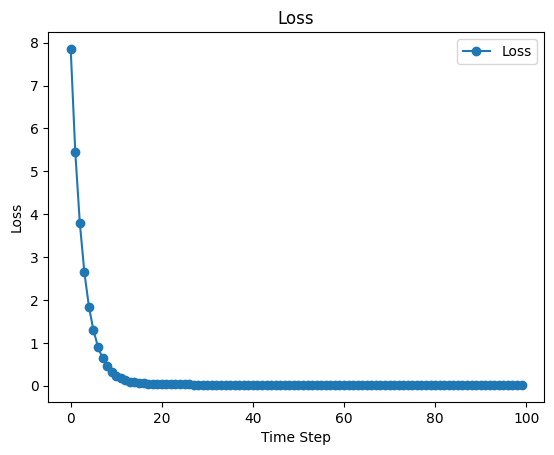

In [15]:
import torch

scalar_values = [tensor.detach().item() for tensor in loss_tracker]

# Plot the scalar values
plt.plot(scalar_values, marker='o', linestyle='-', label='Loss')

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Display the plot
plt.show()


In [20]:
[w,b] = model.parameters()